## Data Munging

Neste notebook geramos novas variáveis para as análises.

In [1]:
import pandas as pd
import os
from config import DIR_DADOS_GERADOS

In [2]:
df = pd.read_csv(os.path.join(DIR_DADOS_GERADOS, 'base_limpa.csv'))

In [3]:
df.head()

,cod_familiar,data_nascimento,sexo,parentesco,escolaridade,referencia_dados,faixa_renda,bairro_oficial,cdregadm,cdbairro,regiao_administrativa
0,X*HXV;+W,04/05/1967,feminino,Pessoa Responsável Familiar,Sem instrução,2024-01,"R$ 0 a R$600,00",VIANELO,S,425.0,Sul
1,X*HXV;+W,29/05/2006,feminino,Neto(a) ou bisneto(a),Fundamental incompleto,2024-01,"R$ 0 a R$600,00",VIANELO,S,425.0,Sul
2,X@;WXW?H,24/08/2006,feminino,Filho(a),Fundamental completo,2024-01,"R$601,00 a R%1.000,00",ELOY CHAVES,W,446.0,Oeste
3,X@;WXW?H,16/03/1984,feminino,Pessoa Responsável Familiar,Médio incompleto,2024-01,"R$601,00 a R%1.000,00",ELOY CHAVES,W,446.0,Oeste
4,**+@?*WXV,11/09/1992,feminino,Filho(a),Médio completo,2024-01,"R$ 0 a R$600,00",SANTA GERTRUDES,S,422.0,Sul


### idade

In [4]:
df['dtime_nascimento'] = pd.to_datetime(df['data_nascimento'], format='%d/%m/%Y')

In [5]:
df['idade'] = pd.Timestamp('now') - df['dtime_nascimento']

In [6]:
df['idade'] = df['idade'].dt.days/365
df['idade'] = df['idade'].round(0).astype(int)

<Axes: title={'center': 'Distribuição de Idade'}, ylabel='Frequency'>

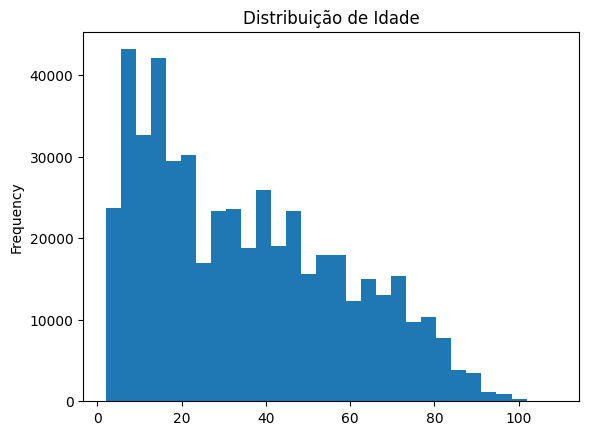

In [7]:
df['idade'].plot.hist(bins=30, title='Distribuição de Idade')

### eligibilidade

Só são eligíveis famílias com renda abaixo de 1000 reais

In [8]:
df['faixa_renda'].unique()

array(['R$ 0 a R$600,00', 'R$601,00 a R%1.000,00', 'R$1.001,00 ou mais'],
      dtype=object)

In [9]:
eligiveis = {'R$ 0 a R$600,00', 'R$601,00 a R%1.000,00'}
df['eligivel'] = df['faixa_renda'].isin(eligiveis)

In [10]:
df['eligivel'].mean()

np.float64(0.7382639138854312)

In [11]:
df.to_csv(os.path.join(DIR_DADOS_GERADOS, 'base_final.csv'), index=False)